In [165]:
#importing librarires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [166]:
#data read

data = pd.read_excel('forgy.xlsx')
print(data)

    x   y
0   4   4
1   8   4
2  15   8
3  24   4
4  24  12


In [167]:
#datapoint gulo ekta list a convert korsi ei part tuku te

x_values = data['x'].tolist()
y_values = data['y'].tolist()


X = [[x, y] for x, y in zip(x_values, y_values)]

print('X=' ,X)

X= [[4, 4], [8, 4], [15, 8], [24, 4], [24, 12]]


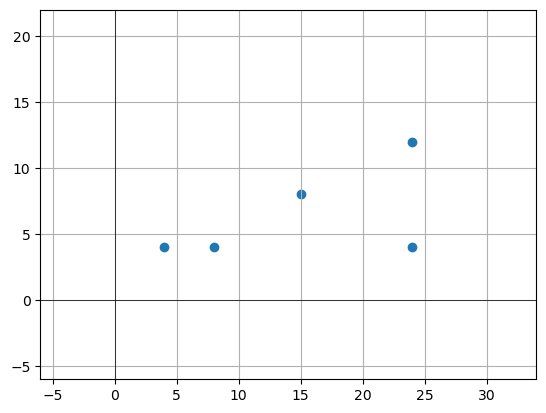

In [168]:
#plotting the datapoint before clustering

x = data['x']
y = data['y']
plt.scatter(x, y)
plt.grid(True)
plt.xlim(min(x) - 10, max(x) + 10)
plt.ylim(min(y) - 10, max(y) + 10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Display grid lines at every unit
# plt.xticks(range(int(min(x)) - 10, int(max(x)) + 11))
# plt.yticks(range(int(min(y)) - 10, int(max(y)) + 11))

In [169]:
# forgy clustering er main kajgulo ei module a.. implementation of forgy clustring from scratch

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def k_means_clustering(data, k):
    # Step 1: Initialize centroids
    centroids = data[:k]

    iteration = 0
    while True:
        iteration += 1
        print(f"Iteration {iteration}")
        print("Current centroids:")
        for centroid in centroids:
            print(centroid)
        print()

        # Step 2: Assign data points to clusters
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_index = np.argmin(distances)
            clusters[cluster_index].append(point)

        # Step 3: Calculate new centroids
        new_centroids = []
        for cluster in clusters:
            new_centroid = np.mean(cluster, axis=0)
            new_centroids.append(new_centroid)

        # Step 4: Check if centroids have changed
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    print("Final centroids:")
    for centroid in centroids:
        print(centroid)

    return clusters


data = np.array(X)
k = int(input("Enter the number of cluster(k): "))

clusters = k_means_clustering(data, k)
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}:")
    for point in cluster:
        print(point)
    print()


Enter the number of cluster(k): 2
Iteration 1
Current centroids:
[4 4]
[8 4]

Iteration 2
Current centroids:
[4. 4.]
[17.75  7.  ]

Iteration 3
Current centroids:
[6. 4.]
[21.  8.]

Final centroids:
[6. 4.]
[21.  8.]
Cluster 1:
[4 4]
[8 4]

Cluster 2:
[15  8]
[24  4]
[24 12]



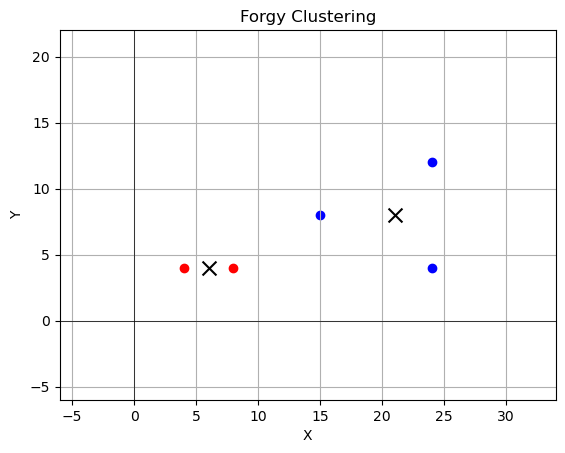

In [170]:
#plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']  
for i, cluster in enumerate(clusters):
    cluster_points = np.array(cluster)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f"Cluster {i+1}")
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
#plt.legend()
plt.grid(True)
plt.xlim(min(x) - 10, max(x) + 10)
plt.ylim(min(y) - 10, max(y) + 10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Forgy Clustering')
plt.show()

[[ 4  4]
 [ 8  4]
 [15  8]
 [24  4]
 [24 12]]


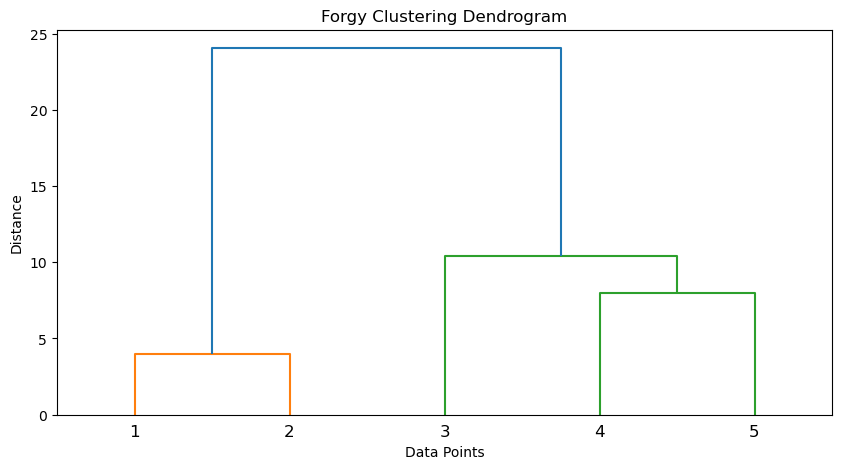

In [171]:
#dendrogram er jonne. K means er jonne dendrogram painai..So wards method er dendrogram. Wards method hierarchical clustering

X = np.array(X)
print(X)

# Perform k-means clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
plt.title('Forgy Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
dendrogram(Z, labels=np.arange(1, X.shape[0]+1))
plt.show()